# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


1)	FRESH: annual spending (m.u.) on fresh products (Continuous); 

2)	MILK: annual spending (m.u.) on milk products (Continuous); 

3)	GROCERY: annual spending (m.u.)on grocery products (Continuous); 

4)	FROZEN: annual spending (m.u.)on frozen products (Continuous) 

5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 

6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 

7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 

8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 

In [5]:
customers.isna().sum()  # No NANS !

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
customers.dtypes  # all dtypes are correct

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

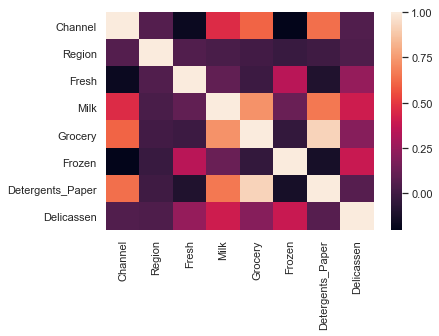

In [7]:
import seaborn as sns
sns.set()
sns.heatmap(data=customers.corr())

# High correlation between detergents paper and grocery, for some reason

In [8]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


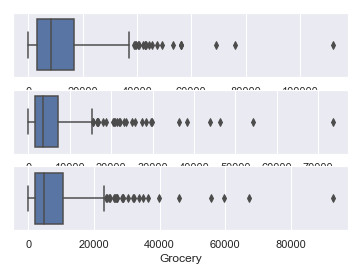

In [9]:
# LOTS OF OUTLIERS

plt.subplot(311)
sns.boxplot(customers.Fresh)

plt.subplot(312)
sns.boxplot(customers.Milk)

plt.subplot(313)
sns.boxplot(customers.Grocery)


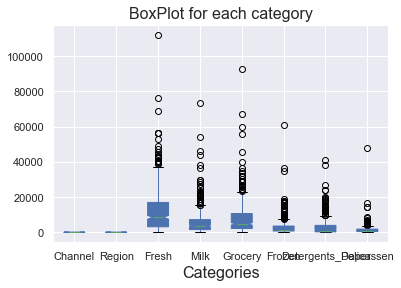

In [10]:
boxplot = customers.boxplot(column=customers.columns.tolist(),patch_artist=True, fontsize=11,
                    notch=True,showfliers=True)
plt.title('BoxPlot for each category',fontsize=16)
plt.xlabel('Categories', fontsize=16)
plt.show()

In [11]:
customers.iloc[:,4]

0       7561
1       9568
2       7684
3       4221
4       7198
5       5126
6       6975
7       9426
8       6192
9      18881
10     12974
11      4523
12     11757
13     14982
14     12091
15      3821
16     12121
17      2933
18     10099
19      9464
20      4602
21      2010
22      4469
23     22019
24     13792
25      7595
26      2861
27      3045
28     25957
29      2609
       ...  
410     4563
411     3281
412    12400
413     6633
414     3417
415     8552
416    10908
417    11055
418    18622
419     2223
420    13227
421     9053
422     4172
423     4657
424    12232
425     2593
426    14316
427     5429
428     4910
429     3580
430    16483
431     5160
432     4754
433     1493
434     7994
435    16027
436      764
437    30243
438     2232
439     2510
Name: Grocery, Length: 440, dtype: int64

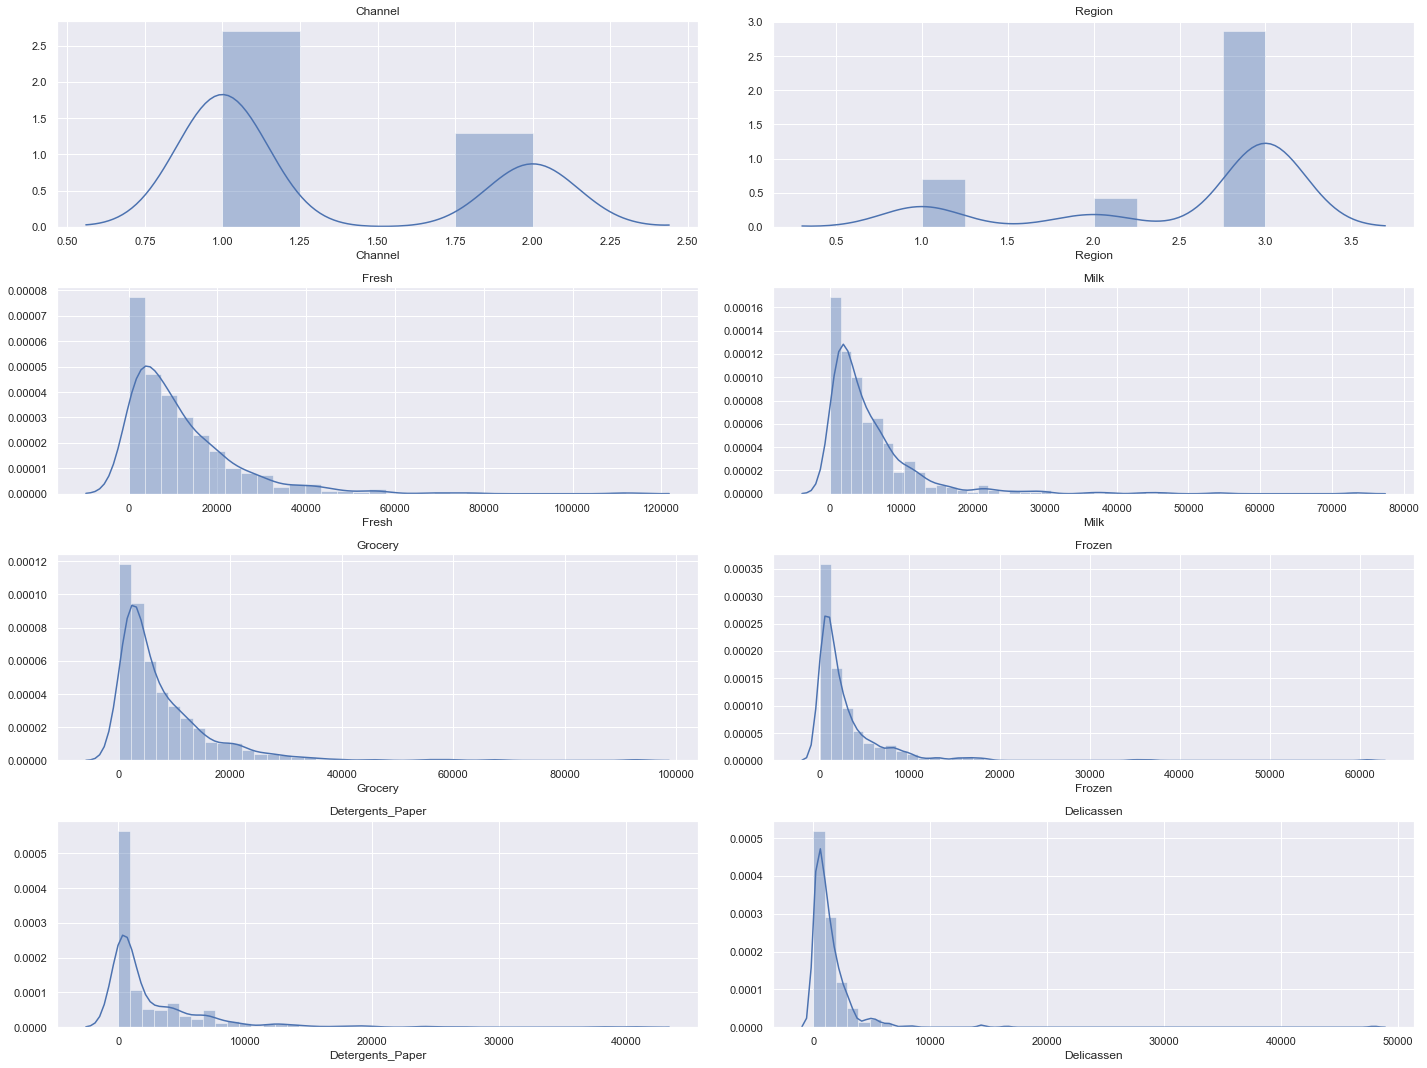

In [55]:


# fig = plt.figure()

# for n in range(0,nbcol):
    
    
#     ax = fig.add_subplot(f'{(n+1)}11')
#     ax.distplot(customers.iloc[:,n])
#sns.set()
import seaborn as sns
import numpy as np


    
# fig, axes = plt.subplots(nrows=nr, ncols=2, figsize = (20,15))



# for ax, title,i in zip(axes.flat, titles, range(0,n)):
#     ax.hist(customers.iloc[:,i])
#     ax.set_title(title)
#     ax.grid(True)
    
# plt.tight_layout()
n=len(customers.columns.tolist())

if n %2 == 0:
    nr = int(n/2)
else:
    nr = int((n+1)/2)
titles = customers.columns.tolist()

fig, axes = plt.subplots(nrows=nr, ncols=2, figsize = (20,15))

for ax, tit,i in zip(axes.flat, titles, range(0,n)):
    sns.distplot(customers.iloc[:,i], ax=ax)
    ax.set(title=tit)
    
plt.tight_layout()

In [75]:
def distplots(df):

    n=len(df.columns.tolist())

    if n %2 == 0:
        nr = int(n/2)
    else:
        nr = int((n+1)/2)
        
    titles = df.columns.tolist()

    fig, axes = plt.subplots(nrows=nr, ncols=2, figsize = (20,15))
    fig.suptitle('Distributions')
    for ax, tit,i in zip(axes.flat, titles, range(0,n)):
        sns.distplot(df.iloc[:,i], ax=ax)
        ax.set(title=tit)
    
    plt.tight_layout()
    return

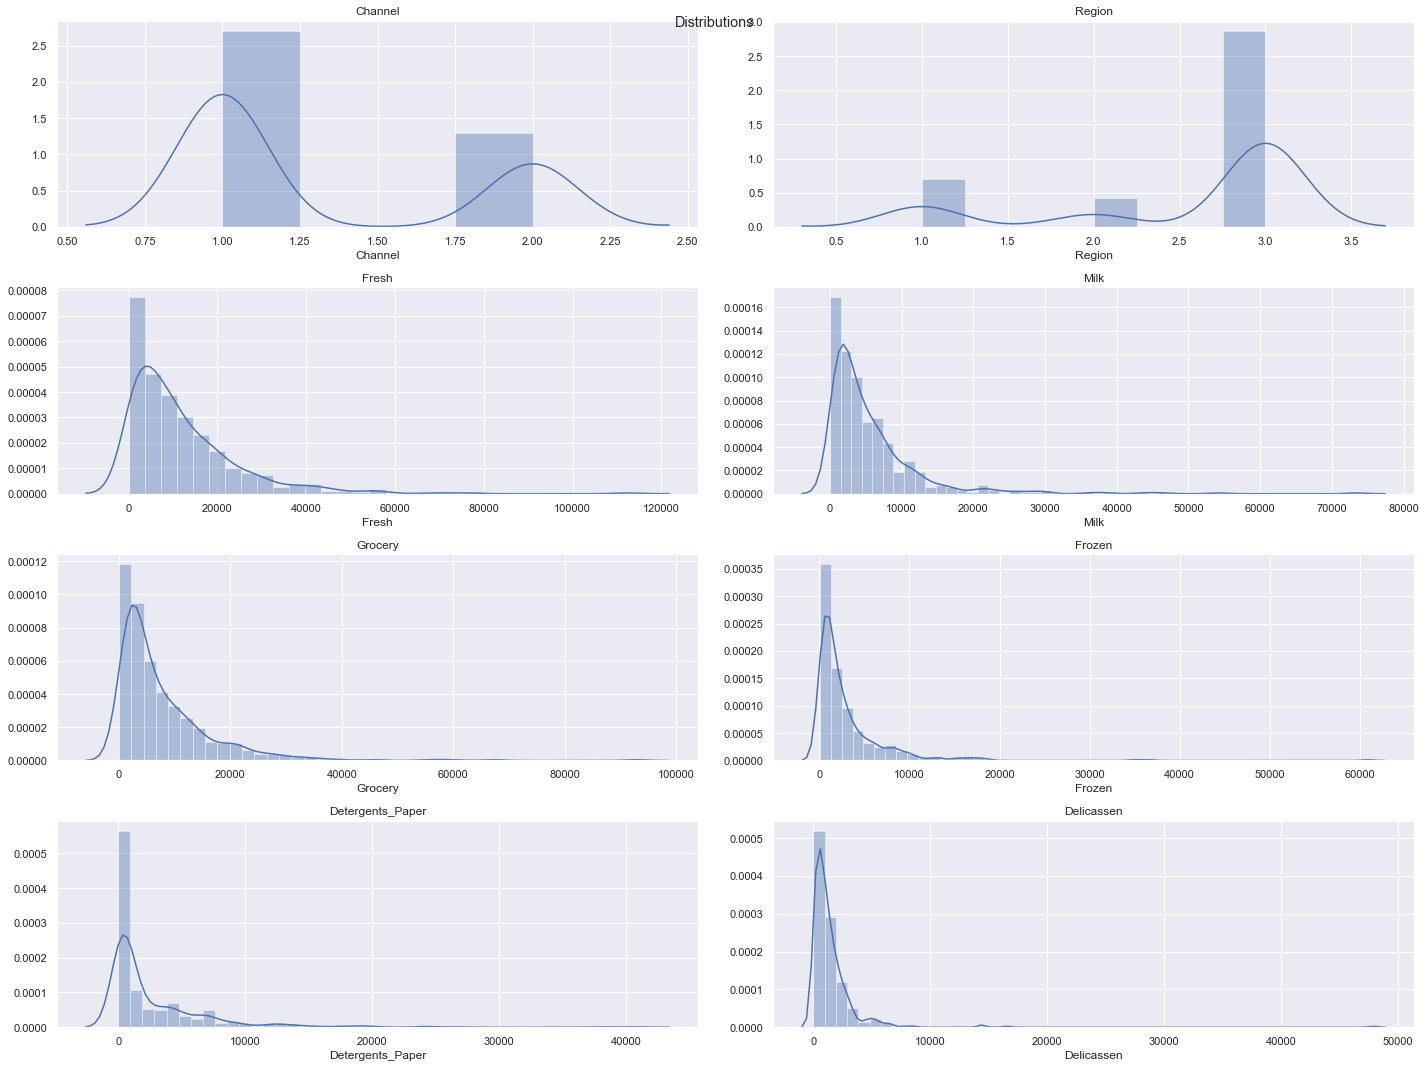

In [76]:
distplots(customers)

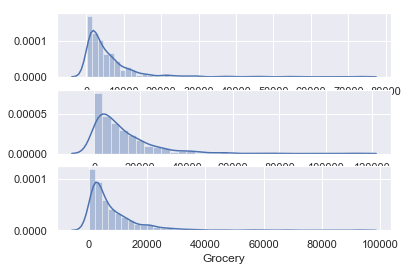

In [16]:
plt.subplot(311)
sns.distplot(customers.Milk)
plt.subplot(312)
sns.distplot(customers.Fresh)
plt.subplot(313)
sns.distplot(customers.Grocery)

In [ ]:
# Your observations here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [42]:
def iqrtesting(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    testingIQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return testingIQR

In [43]:
# Your comment here

dftest = iqrtesting(customers)

In [44]:
dftest.shape

#We lost about 65 rows, over 400

(332, 8)

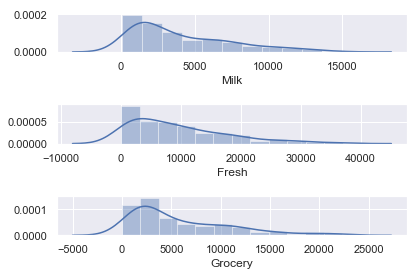

In [46]:
plt.subplot(311)
sns.distplot(dftest.Milk)
plt.subplot(312)
sns.distplot(dftest.Fresh)
plt.subplot(313)
sns.distplot(dftest.Grocery)
plt.tight_layout()
plt.show()

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [67]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(customers)
customers_scale = scaler.transform(customers)

########


scaler2 = StandardScaler()
scaler2.fit(dftest)
dftestscale = scaler2.transform(dftest)

C:\Users\Arty\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arty\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  
C:\Users\Arty\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arty\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [68]:
# Your code here:
from sklearn.cluster import KMeans

kmeans=KMeans(4)
df_cluster=kmeans.fit(customers_scale)
customers['labels']=df_cluster.labels_

###################"
df_cluster2=kmeans.fit(dftestscale)
dftest['labels']=df_cluster2.labels_

C:\Users\Arty\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Count the values in `labels`.

In [54]:
# Your code here:
customers['labels'].value_counts()

1    296
2    130
3     12
0      2
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [69]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5).fit(customers_scale)
customers['labels_DBSCAN']=dbscan.labels_

####
dbscan2=DBSCAN(eps=0.5).fit(dftestscale)
dftest['labels_DBSCAN']=dbscan2.labels_

C:\Users\Arty\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Count the values in `labels_DBSCAN`.

In [58]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

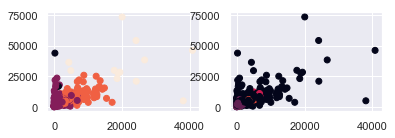

In [66]:
# Your code here:
plt.subplot(221)
plt.scatter(x=customers['Detergents_Paper'], y=customers['Milk'], c=customers['labels'])
plt.subplot(222)
plt.scatter(x=customers['Detergents_Paper'], y=customers['Milk'], c=customers['labels_DBSCAN'])
plt.show()

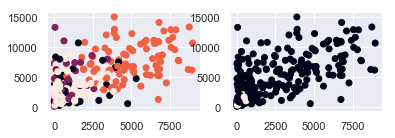

In [70]:
plt.subplot(221)
plt.scatter(x=dftest['Detergents_Paper'], y=dftest['Milk'], c=dftest['labels'])
plt.subplot(222)
plt.scatter(x=dftest['Detergents_Paper'], y=dftest['Milk'], c=dftest['labels_DBSCAN'])
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

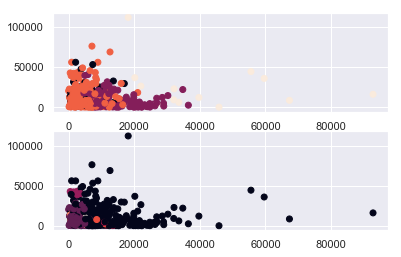

In [77]:
# Your code here:
plt.subplot(211)
plt.scatter(x=customers['Grocery'], y=customers['Fresh'], c=customers['labels'])
plt.subplot(212)
plt.scatter(x=customers['Grocery'], y=customers['Fresh'], c=customers['labels_DBSCAN'])
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

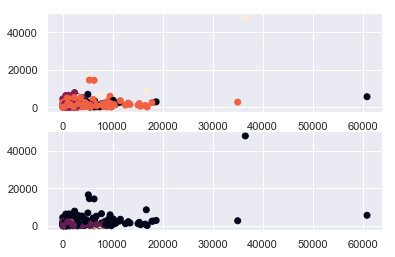

In [78]:
# Your code here:
plt.subplot(211)
plt.scatter(x=customers['Frozen'], y=customers['Delicassen'], c=customers['labels'])
plt.subplot(212)
plt.scatter(x=customers['Frozen'], y=customers['Delicassen'], c=customers['labels_DBSCAN'])
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [79]:
# Your code here:
customers.groupby(['labels']).agg('mean')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.000000,1.092308,12791.123077,3889.446154,4124.353846,3973.200000,899.846154,1245.323077,2.292308
1,2.000000,2.623077,8165.915385,8748.515385,13905.492308,1441.630769,5991.146154,1535.007692,-0.538462
2,1.004310,2.900862,13155.685345,3030.823276,3780.426724,3521.556034,742.422414,1241.387931,0.185345
3,1.846154,2.615385,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692,-1.000000


In [80]:
customers.groupby(['labels_DBSCAN']).agg('mean')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,1.356863
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,1.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,2.000000
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,2.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,1.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,1.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,0.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,0.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,0.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

C:\Users\Arty\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


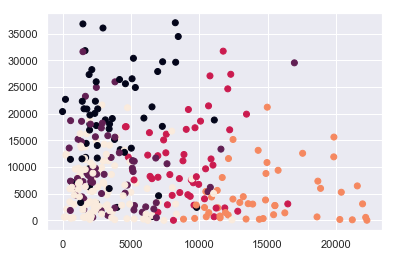

In [82]:
# Your code here
kmeans=KMeans(5)
df_cluster2=kmeans.fit(dftestscale)
dftest['labels']=df_cluster2.labels_

plt.scatter(x=dftest['Grocery'], y=dftest['Fresh'], c=dftest['labels'])

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here